<a href="https://colab.research.google.com/github/Micahgs/Data-science-Assignments/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_excel( "https://github.com/Micahgs/DATA-science-asiignment-datasets/raw/2a501e05eabc51efcd133a96c9b37d5ccc6849b3/glass.xlsx", sheet_name="glass")
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [16]:
print("Shape of data:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())

Shape of data: (214, 10)

Data types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Summary statistics:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500  

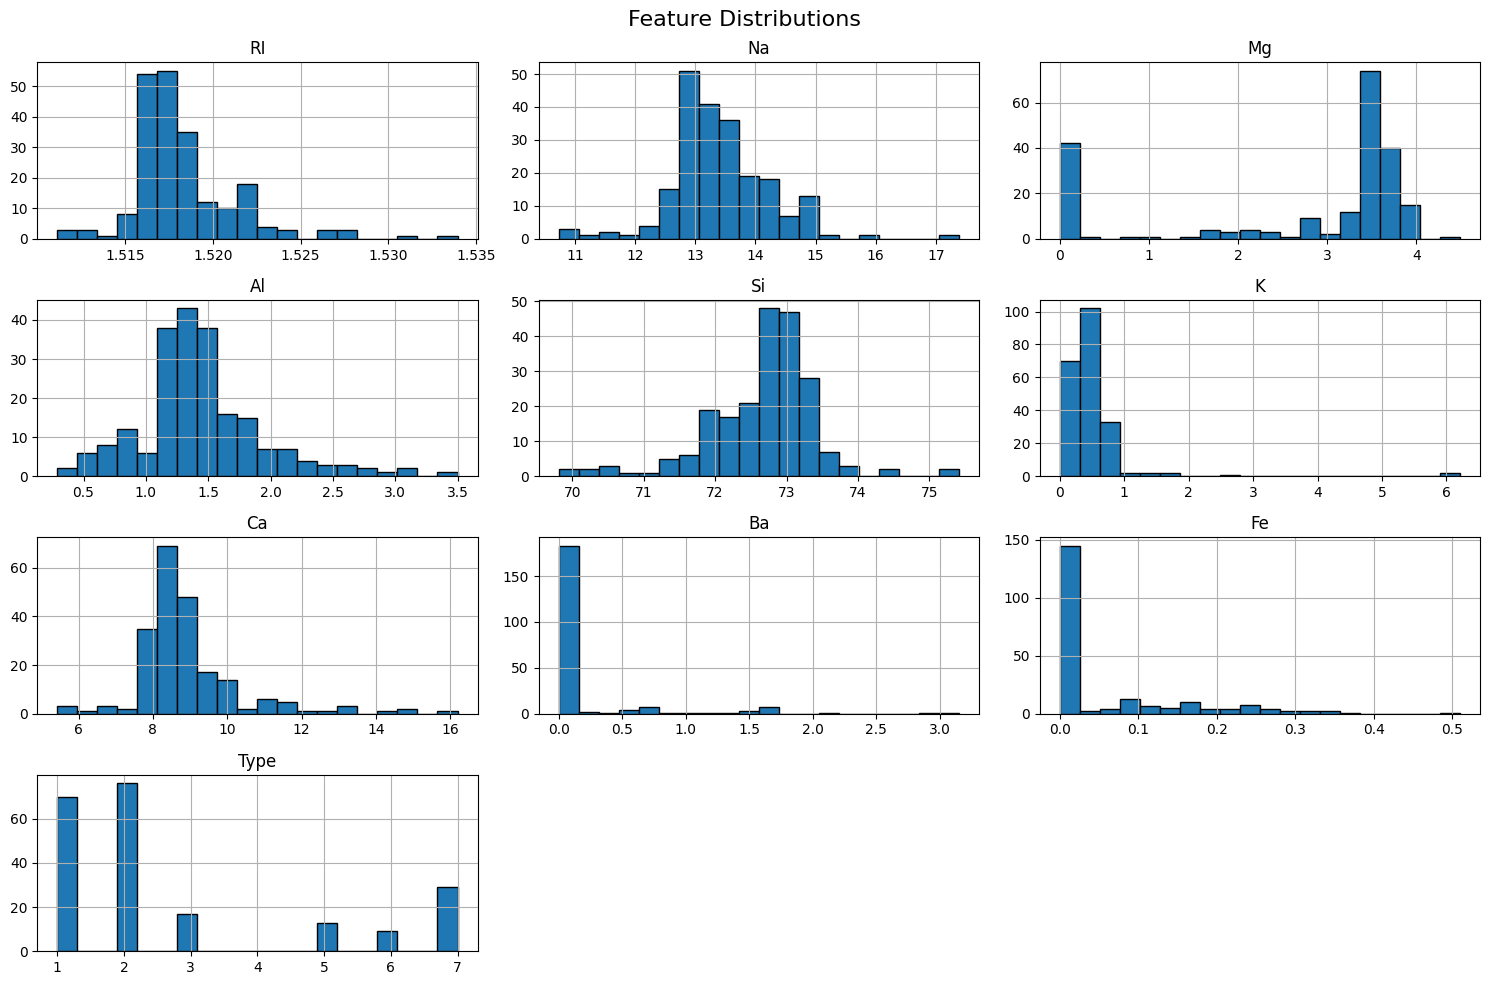

In [19]:
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

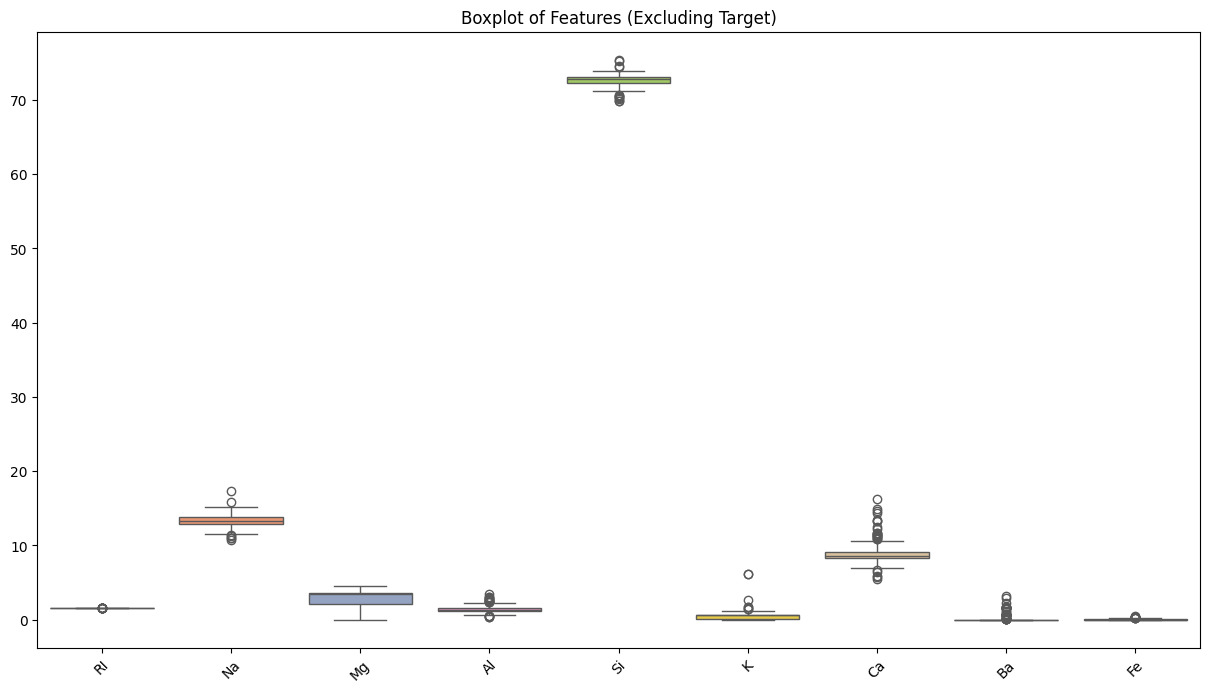

In [20]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop("Type", axis=1), palette="Set2")
plt.title("Boxplot of Features (Excluding Target)")
plt.xticks(rotation=45)
plt.show()


In [21]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [25]:
X = df.drop("Type", axis=1)
y = df["Type"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print("Before SMOTE:", Counter(y))

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({2: 76, 1: 70, 7: 29, 3: 17, 5: 13, 6: 9})
After SMOTE: Counter({1: 76, 2: 76, 3: 76, 5: 76, 6: 76, 7: 76})


# **Train test_split**

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# **Model Building Ranodom Forest(Bagging)**

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9130434782608695

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



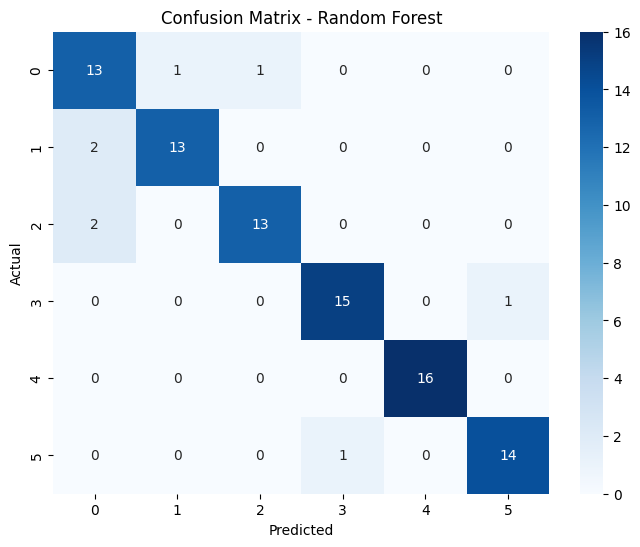

In [30]:


# Predict
y_pred = rf_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# **Radiant Boosting Technique**

Gradient Boosting Accuracy: 0.9130434782608695

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.81      0.87      0.84        15
           3       0.93      0.87      0.90        15
           5       1.00      0.94      0.97        16
           6       0.89      1.00      0.94        16
           7       1.00      0.93      0.97        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



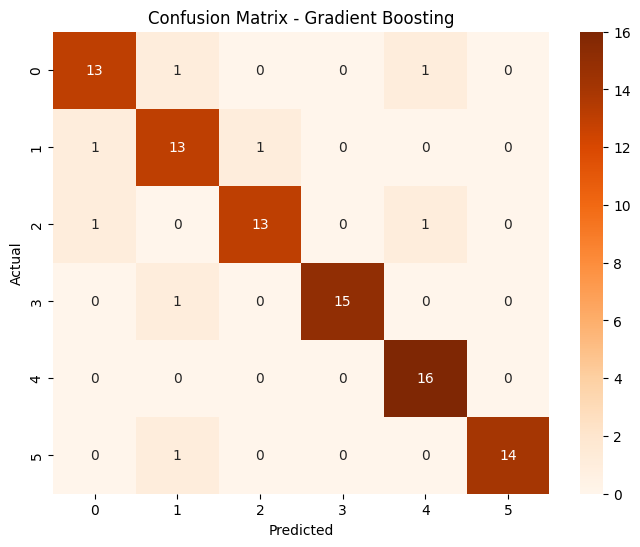

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Train
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Questions**
1)Explain Bagging and Boosting methods. How is it different from each other.
Bagging and Boosting are ensemble techniques used to improve model performance, but they work differently. Bagging (like Random Forest) builds several models in parallel on random subsets of the data and then combines their results to reduce variance and avoid overfitting. In contrast, Boosting (like Gradient Boosting) builds models one after another, where each new model focuses on correcting the mistakes of the previous ones, helping to reduce bias.

2) Explain how to handle imbalance in the data
Imbalanced data means some classes have many more samples than others, which can lead the model to ignore the smaller classes and make biased predictions. To handle this, we can either reduce the majority class (undersampling), increase the minority class (oversampling), or use smarter techniques like SMOTE, which creates synthetic examples of the minority class. In this project, we used SMOTE to balance the dataset, helping the model learn equally from all glass types and improving its ability to predict the rare ones correctly.

